In [1]:
# For loading the webdriver from selenium
from selenium import webdriver 
# Loading the options from selenium for chrome browser
from selenium.webdriver.chrome.options import Options
# Loading for the keys event in order to scroll and use the keys virtually for the purpose
from selenium.webdriver.common.keys import Keys 
# Loadig from time which has a property sleep for our assignment purpose
import time as time
# Loading for writing into the CSV
import csv
# Loading for creating the DataFrame purpose
import pandas as pd
# Loading for the regular expression for our assignment purpose
import re

In [7]:
locationOfWebdriver = "D:/ISB/Files/chromedriver_win32/chromedriver.exe"
# We are trying to open in the incognito mode
chrome_options = Options()
chrome_options.add_argument("--incognito")
driver = webdriver.Chrome(executable_path = locationOfWebdriver, chrome_options = chrome_options)
# URL which we are trying to load in the browser
driver.get("https://www.google.co.in")
driver.maximize_window()
# Retreiving the serach box id, where in we can pas the text


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [8]:
# Please provide path location, it'll open the file over there

csv_file = open('D:/ISB/Files/Wiki.csv', 'w', encoding="UTF-8", newline="")
writer = csv.writer(csv_file)
writer.writerow(['category', 'Content'])

18

In [10]:
# file = open('D:/ISB/Files/Wikiscraping1.txt', 'w', encoding="UTF-8", newline="")
# categories = ['Cricket','Technology','Health','Movie']
categories = ['Cricket']
for category in categories:    
    if (category == 'Health' or category == 'Technology' or category == 'Movie'):
        i = 2
    else :
        i = 1
    el = driver.find_element_by_xpath("//*[@id='tsf']/div[2]/div/div["+str(i)+"]/div/div[1]/input")
    driver.find_element_by_xpath("//*[@id='tsf']/div[2]/div/div["+str(i)+"]/div/div[1]/input").clear()    
    # Addng the text in the box    
    context = "Wikipedia "  + category
    print(context)
    time.sleep(5)    
    el.send_keys(context)
    # this will hit the Enter key virtually and make the event, which will take further action an proceed
    el.send_keys(Keys.RETURN)
    # Initialize an empty dictionary for each reviews commetn
    review_dict = {}
    try:
        if (category == 'Movie'):
            WikiContentPointer = driver.find_elements_by_xpath("//*[@id='rso']/div[1]/div/div[1]/div/div/div[1]/a")
        else :
            WikiContentPointer = driver.find_elements_by_xpath("//*[@id='rso']/div[1]/div/div/div/div/div[1]/a")
        for content in WikiContentPointer:
            try:         
                link_url = content.get_attribute('href')
                driver.get(link_url)
                data = "\n"
                data = driver.find_element_by_xpath("//*[@id='bodyContent']").text
                review_dict['category'] = category
                review_dict['data'] = data
                writer.writerow(review_dict.values())
#                 file.write(data)
            except:
                link_url = "Nothing"
        print(link_url)
        csv_file.close()
#         print(data)
        
    except Exception as e:
                print(e)
                driver.close()
                break
    
    driver.execute_script("window.history.go(-1)")
    time.sleep(5)
# file.close()
# print(data_dict)

WebDriverException: Message: chrome not reachable
  (Session info: chrome=70.0.3538.110)
  (Driver info: chromedriver=2.42.591088 (7b2b2dca23cca0862f674758c9a3933e685c27d5),platform=Windows NT 10.0.17134 x86_64)


In [8]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [9]:
# path1 = 
# filename1 = 'Wikiscraping.txt' # 'Game of Thrones IMDB reviews.txt'  # 'ISB PGP.txt'
corpus0 = open('D:/ISB/Files/Wikiscraping.txt',encoding="UTF-8",).readlines() 

In [14]:
# import gensim.parsing.preprocessing
from gensim.parsing.preprocessing import strip_punctuation, strip_tags, strip_numeric
from nltk.stem.wordnet import WordNetLemmatizer   
from nltk.corpus import stopwords
import string  # for the .join() func

lemma = WordNetLemmatizer()

# NLTK Stop words extended
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def textClean(text0):
    text1 = [strip_punctuation(doc) for doc in text0]
    text1 = [strip_tags(doc) for doc in text1]
    text1 = [strip_numeric(doc) for doc in text1]
    text1 = [[" ".join([i for i in doc.lower().split() if i not in stop_words])] for doc in text1]
    text2 = [[word for word in ' '.join(doc).split()] for doc in text1]
    normalized = [[" ".join([lemma.lemmatize(word) for word in ' '.join(doc).split()])] for doc in text1]
    print(normalized)
    return normalized

corpus1 = textClean(corpus0)  # corpus cleaned of html tags, puncs, lemmas

[['wikipedia free encyclopedia'], ['jump navigation'], ['jump search'], ['article sport insect see cricket insect us see cricket disambiguation'], ['cricketer redirects us see cricketer disambiguation'], ['cricket'], ['eden garden india floodlight icc world twenty final'], ['highest governing body international cricket council'], ['first played th century south east england'], ['characteristic'], ['contact'], ['team member player per side substitute permitted circumstance'], ['mixed gender yes separate competition'], ['type team sport bat ball'], ['equipment cricket ball cricket bat wicket stump bail various protective equipment'], ['venue cricket field'], ['glossary glossary cricket term'], ['presence'], ['country region worldwide prominent indian sub continent australia british isle southern africa west indie'], ['olympic summer olympics'], ['cricket bat ball game played two team eleven player field centre metre yard pitch wicket end comprising two bail balanced three stump batting s

In [17]:
## DTM building etc via gensim
corpus2 = [[word for word in ' '.join(doc).split()] for doc in corpus1]  # word_tokenize first
# print(corpus2)
# Building the bigram and trigram models
bigram = gensim.models.Phrases(corpus2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# print(trigram_mod[bigram_mod[corpus2[0]]])  # See trigram example

id2word = corpora.Dictionary(corpus2)  # Create Dictionary
corpus = [id2word.doc2bow(text) for text in corpus2]  # Building gensim corpus. TF DTM creation.
print(corpus[:1])  # View one doc in abstract form

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
D:\Anaconda3\lib\site-packages\gensim\models

[[(0, 1), (1, 1), (2, 1)]]


In [18]:
# Human readable format of corpus (term-frequency)
a0 = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:9]]
[x for (x, y) in a0[0] if y >4]

[]

In [19]:
# Build LDA model for (say) K=4 topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
## def func for beta_df
import pandas as pd

## obtain the factor matrices - beta
def build_beta_df(lda_model=lda_model, id2word=id2word):
    beta = lda_model.get_topics()  # shape (num_topics, vocabulary_size).
    beta_df = pd.DataFrame(data=beta)

    # convert colnames in beta_df 2 tokens
    token2col = list(id2word.token2id)
    beta_df.columns = token2col
    # beta_df.loc[0,:].sum()  # checking if rows sum to 1

    # convert rownames too, eh? Using format(), .shape[] and range()
    rowNames=['topic' + format(x+1, '02d') for x in range(beta_df.shape[0])]
    rowNames_series = pd.Series(rowNames)
    beta_df.rename(index=rowNames_series, inplace=True)
    return(beta_df)

# invoke func
beta_df = build_beta_df(lda_model=lda_model, id2word=id2word)
beta_df.iloc[:8, :8]

,encyclopedia,free,wikipedia,jump,navigation,search,article,cricket
topic01,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000063,0.000064
topic02,0.000051,0.000056,0.000051,0.000051,0.000051,0.000064,0.000051,0.000051
topic03,0.000014,0.000014,0.000014,0.000338,0.000040,0.000178,0.000014,0.000014
topic04,0.000140,0.000442,0.000182,0.000051,0.000047,0.000050,0.000682,0.003017


In [20]:
# func to get gamma matrix by looping using list.comp
def build_gamma_df(lda_model, corpus0):
    gamma_doc = []  # empty list 2 populate with gamma colms
    num_topics = lda_model.get_topics().shape[0]
    
    for doc in range(len(corpus0)):
        doc1 = corpus0[doc].split()
        bow_doc = id2word.doc2bow(doc1)
        gamma_doc0 = [0]*num_topics  # define list of zeroes num_topics long
        gamma_doc1 = lda_model.get_document_topics(bow_doc)
        gamma_doc2_x = [x for (x,y) in gamma_doc1]#; gamma_doc2_x
        gamma_doc2_y = [y for (x,y) in gamma_doc1]#; gamma_doc2_y
        for i in range(len(gamma_doc1)):
            x = gamma_doc2_x[i]
            y = gamma_doc2_y[i]
            gamma_doc0[x] = y  # wasn't geting this in list comprehension somehow 
        gamma_doc.append(gamma_doc0)
        
    gamma_df = pd.DataFrame(data=gamma_doc)  # shape=num_docs x num_topics
    topicNames=['topic' + format(x+1, '02d') for x in range(num_topics)]
    topicNames_series = pd.Series(topicNames)
    gamma_df.rename(columns=topicNames_series, inplace=True)
    return(gamma_df)

# now apply func
gamma_df = build_gamma_df(lda_model=lda_model, corpus0=corpus0)
gamma_df.iloc[:8, :]

,topic01,topic02,topic03,topic04
0,0.041239,0.060533,0.167249,0.730979
1,0.060946,0.089646,0.722197,0.127211
2,0.060923,0.089451,0.723583,0.126043
3,0.031165,0.045724,0.126129,0.796981
4,0.041339,0.061183,0.175136,0.722341
5,0.116566,0.171008,0.471607,0.240820
6,0.116566,0.171008,0.471607,0.240820
7,0.041241,0.060555,0.167501,0.730703


In [21]:
gamma_df.iloc[2,:].sum()  # check if the topic propns are ok

1.0000000298023224

In [22]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # model fit metric. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.033609849026039


D:\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
D:\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
D:\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs



Coherence Score:  nan


In [23]:
## compute coherence score (akin to LMD?)
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    num_topics1 = [i for i in range(start, limit, step)]
    for num_topics in num_topics1:
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
                                           update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values  # note, list of 2 objs returned

In [24]:
# Can take a long time to run.
start1=2
limit1=19
step1=1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                        texts=corpus2, start=start1, limit=limit1, step=step1)

print(coherence_values)

[0.4713799726129662, 0.5116250656425597, 0.5461615872477334, 0.5039580956068133, 0.4988347968441175, 0.5251288839133158, 0.4506866486637697, 0.4714325707999831, 0.4911636946897591, 0.5237739637610465, 0.49240803242220704, 0.49785074950995534, 0.5055848205617215, 0.5164980227816653, 0.5002480674913199, 0.5075014681619316, 0.5339785229309784]


In [25]:
# obtain optimal topic number
coher = list(enumerate(coherence_values))  # create an index for each list elem
index_max = [x for (x,y) in coher if y==max(coherence_values)]  # obtain index num corres to max coherence value
Optimal_numTopics = int(str(index_max[0]))+2  # convert that list elem into integer (int()) via string (str())
print(Optimal_numTopics)  

4


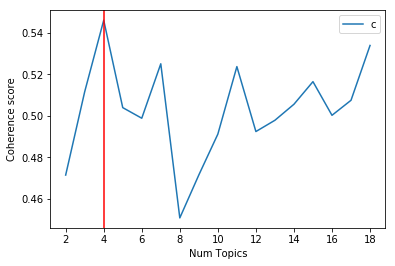

In [26]:
## Plot the change in coherence score with num_topics
import matplotlib.pyplot as plt
%matplotlib inline

start1=2
limit1=19
step1=1
# Show graph
x = range(start1, limit1, step1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.axvline(x=Optimal_numTopics, color='r')
plt.show()

In [27]:
len(model_list)

17

In [28]:
## compute perplexity fit
def compute_perplexity_values(model_list, corpus, start, limit, step):
    """
    Compute c_v perplexity for various number of topics

    Parameters:
    ----------
    model list : LDA models list from coherence calc
    corpus : Gensim corpus
    start, limit, step
    

    Returns:
    -------
    model_list : List of LDA topic models
    perplexity_values : Perplexity fit metric for LDA model on a corpus. Lower the better.
    """
    perplexity_values = []
    for num_topics in range(start, limit, step):
        #model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
        #                                  update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_index = num_topics - start
        model = model_list[model_index]
        perplexity_values.append(model.log_perplexity(corpus))
        #model_list.append(model)
        

    return perplexity_values  # note, list of 2 objs returned

# Can take a long time to run.
# perplexity_values = compute_perplexity_values(dictionary=id2word, corpus=corpus, start=2, limit=15, step=1)
perplexity_values = compute_perplexity_values(model_list, corpus=corpus, start=start1, limit=limit1, step=step1)
print(perplexity_values)

[-8.916789597802211, -8.827347138394721, -9.033609853914802, -9.20724448290948, -9.30286060715036, -9.356831898543874, -9.520689152025506, -9.534439482013042, -9.56160727673754, -9.578647172473174, -9.664486412130088, -9.65173632921493, -9.640566579858307, -9.704887891779231, -9.708953982301985, -9.720437078604446, -9.766787507723814]


In [29]:
# compute optimal num_topics using perplexity based fit
perpl = list(enumerate(perplexity_values))  # create an index for each list elem
index_min = [x for (x,y) in perpl if y==min(perplexity_values)]  # obtain index num corres to max coherence value
optimal_numTopics = int(str(index_min[0]))+2  # convert that list elem into integer (int()) via string (str())
print(optimal_numTopics) 

18


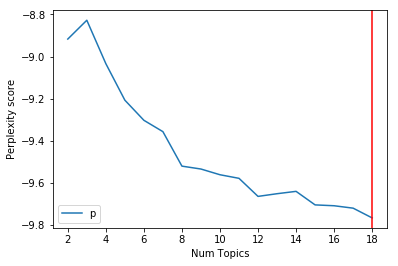

In [30]:
# graph the perplexity fit and see
import matplotlib.pyplot as plt
%matplotlib inline

# Show graph
x = range(start1, limit1, step1)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.axvline(x=optimal_numTopics, color='r')
plt.show()

In [31]:
# seems optimal num_topics is 10
optimal_model = model_list[Optimal_numTopics]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.032*"director" + 0.026*"screenplay" + 0.013*"drama" + 0.012*"picture" + '
  '0.011*"variety" + 0.011*"entertainment" + 0.011*"anthony" + '
  '0.010*"alessandro" + 0.008*"comedy" + 0.008*"man"'),
 (1,
  '0.078*"april" + 0.052*"august" + 0.045*"may" + 0.017*"fall" + '
  '0.016*"exclusive" + 0.011*"medium" + 0.008*"rom" + 0.007*"llc" + '
  '0.007*"prometheus" + 0.007*"variety"'),
 (2,
  '0.055*"retrieved" + 0.037*"u" + 0.036*"november" + 0.034*"comingsoon" + '
  '0.029*"com" + 0.024*"net" + 0.013*"b" + 0.010*"september" + 0.010*"john" + '
  '0.009*"–"'),
 (3,
  '0.017*"season" + 0.012*"dark" + 0.011*"summer" + 0.010*"feature" + '
  '0.009*"jungle" + 0.009*"focus" + 0.008*"two" + 0.007*"warner" + '
  '0.007*"bros" + 0.007*"night"'),
 (4,
  '0.012*"pic" + 0.010*"thanksgiving" + 0.009*"health" + 0.008*"act" + '
  '0.007*"power" + 0.007*"sundance" + 0.007*"mile" + 0.007*"boy" + '
  '0.007*"simple" + 0.007*"favor"'),
 (5,
  '0.094*"retrieved" + 0.034*"hollywood" + 0.024*"deadline" + 

In [32]:
# Get main topic in each document
gamma_df = build_gamma_df(lda_model=optimal_model, corpus0=corpus0)
#gamma_df.iloc[:8,:8]

row0 = gamma_df.values.tolist()
row=[]
for i in range(len(row0)):
    row1 = list(enumerate(row0[i]))
    row1_y = [y for (x,y) in row1]
    max_propn = sorted(row1_y, reverse=True)[0]
    row2 = [(i, x, y) for (x, y) in row1 if y==max_propn]
    row.append(row2)

row[0:7]

[[(0, 3, 0.5551977753639221)],
 [(1, 4, 0.3916536569595337)],
 [(2, 5, 0.5407761931419373)],
 [(3, 3, 0.4434528052806854)],
 [(4, 3, 0.5350926518440247)],
 [(5, 5, 0.3051631450653076)],
 [(6, 5, 0.3051631450653076)]]

In [33]:
sent_topics_df = pd.DataFrame()
for row1 in row:
    for (doc_num, topic_num, prop_topic) in row1:
        wp = optimal_model.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(doc_num), int(topic_num), 
                                                          round(prop_topic,4), 
                                                          topic_keywords]), 
                                                       ignore_index=True)
    
sent_topics_df.columns = ['Doc_num', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']    
sent_topics_df.iloc[:8, :]

,Doc_num,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0.0,3.0,0.5552,"season, dark, summer, feature, jungle, focus, ..."
1,1.0,4.0,0.3917,"pic, thanksgiving, health, act, power, sundanc..."
2,2.0,5.0,0.5408,"retrieved, hollywood, deadline, release, ameri..."
3,3.0,3.0,0.4435,"season, dark, summer, feature, jungle, focus, ..."
4,4.0,3.0,0.5351,"season, dark, summer, feature, jungle, focus, ..."
5,5.0,5.0,0.3052,"retrieved, hollywood, deadline, release, ameri..."
6,6.0,5.0,0.3052,"retrieved, hollywood, deadline, release, ameri..."
7,7.0,5.0,0.3945,"retrieved, hollywood, deadline, release, ameri..."


In [34]:
# Add original text to the end of the output
contents = pd.Series(corpus0)
sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#return(sent_topics_df)
sent_topics_df.columns = ['Doc_num', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'contents']
sent_topics_df.iloc[:8,:]

,Doc_num,Dominant_Topic,Perc_Contribution,Topic_Keywords,contents
0,0.0,3.0,0.5552,"season, dark, summer, feature, jungle, focus, ...","From Wikipedia, the free encyclopedia\n"
1,1.0,4.0,0.3917,"pic, thanksgiving, health, act, power, sundanc...",Jump to navigation\n
2,2.0,5.0,0.5408,"retrieved, hollywood, deadline, release, ameri...",Jump to search\n
3,3.0,3.0,0.4435,"season, dark, summer, feature, jungle, focus, ...",This article is about the sport. For the insec...
4,4.0,3.0,0.5351,"season, dark, summer, feature, jungle, focus, ...","""Cricketer"" redirects here. For other uses, se..."
5,5.0,5.0,0.3052,"retrieved, hollywood, deadline, release, ameri...",Cricket\n
6,6.0,5.0,0.3052,"retrieved, hollywood, deadline, release, ameri...","Eden Gardens, India under floodlights during 2..."
7,7.0,5.0,0.3945,"retrieved, hollywood, deadline, release, ameri...",Highest governing body International Cricket C...
